### Import dependencies

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
#view settings
pd.set_option('display.max_column', None)
# pd.set_option('display.max_row', None)
pd.set_option('display.max_colwidth', None)

#reset
# pd.reset_option('all')

### Load CSV into DF, remove null and unused column

In [37]:
df = pd.read_csv('../dataset/from_survey/clean_result.csv')

In [69]:
df = df.fillna('')

In [43]:
df = df.drop(columns=['follow_up', 'email'])

### Change type string to int

In [39]:
import ast 

for i in range (0, df.shape[0]):

    # Row you want to remove items from
    row_index = i

    # List of column names you want to process
    columns_to_process = ['f_child_age', 'm_child_age']

    # Loop through the specified columns
    for column in columns_to_process:
        # Get the list at the specified row and column
        original_string = df.at[row_index, column]
        
        # Remove items equal to 'please specify:'
        try:
            result_list = ast.literal_eval(original_string)
            
        except ValueError:
            pass
        
        # Update the DataFrame with the filtered list
        df.at[row_index, column] = result_list

In [51]:
df[['age', 'total_child', 'f_child', 'm_child']] = df[['age', 'total_child', 'f_child', 'm_child']].apply(pd.to_numeric, errors='coerce')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 40 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   gender                                  63 non-null     object
 1   age                                     63 non-null     int64 
 2   ethnicity                               63 non-null     object
 3   ethnicity_o                             12 non-null     object
 4   edu_level                               63 non-null     object
 5   total_child                             63 non-null     int64 
 6   f_child                                 63 non-null     int64 
 7   f_child_age                             63 non-null     object
 8   m_child                                 63 non-null     int64 
 9   m_child_age                             63 non-null     object
 10  freq_meals_daily                        63 non-null     object
 11  freq_eat

## EDA

### Categorical, bar charts

In [66]:
df.keys()

Index(['gender', 'age', 'ethnicity', 'ethnicity_o', 'edu_level', 'total_child',
       'f_child', 'f_child_age', 'm_child', 'm_child_age', 'freq_meals_daily',
       'freq_eat_out_weekly', 'reasons_eat_out', 'reasons_eat_out_o',
       'reasons_eat_in', 'reasons_eat_in_o', 'freq_fast_food',
       'reasons_fast_food', 'preference_cooking_method',
       'preference_cooking_method_o', 'reasons_preference_cooking_method',
       'reasons_preference_cooking_method_o', 'who_make_decisions',
       'who_make_decisions_o', 'type_grocery', 'type_grocery_o',
       'freq_fresh_produce', 'freq_prepackaged_meal',
       'consider_grocery_nutritional_value',
       'child_influence_more_healthy_food', 'child_influence_new_recipe',
       'child_influence_grocery', 'include_child_in_meal_planning',
       'child_influence_less_unhealthy_food', 'prepare_separate_meals',
       'child_influence_learning_healthy_diet',
       'child_influence_overall_healthier_diet', 'reasons_child_influence',
      

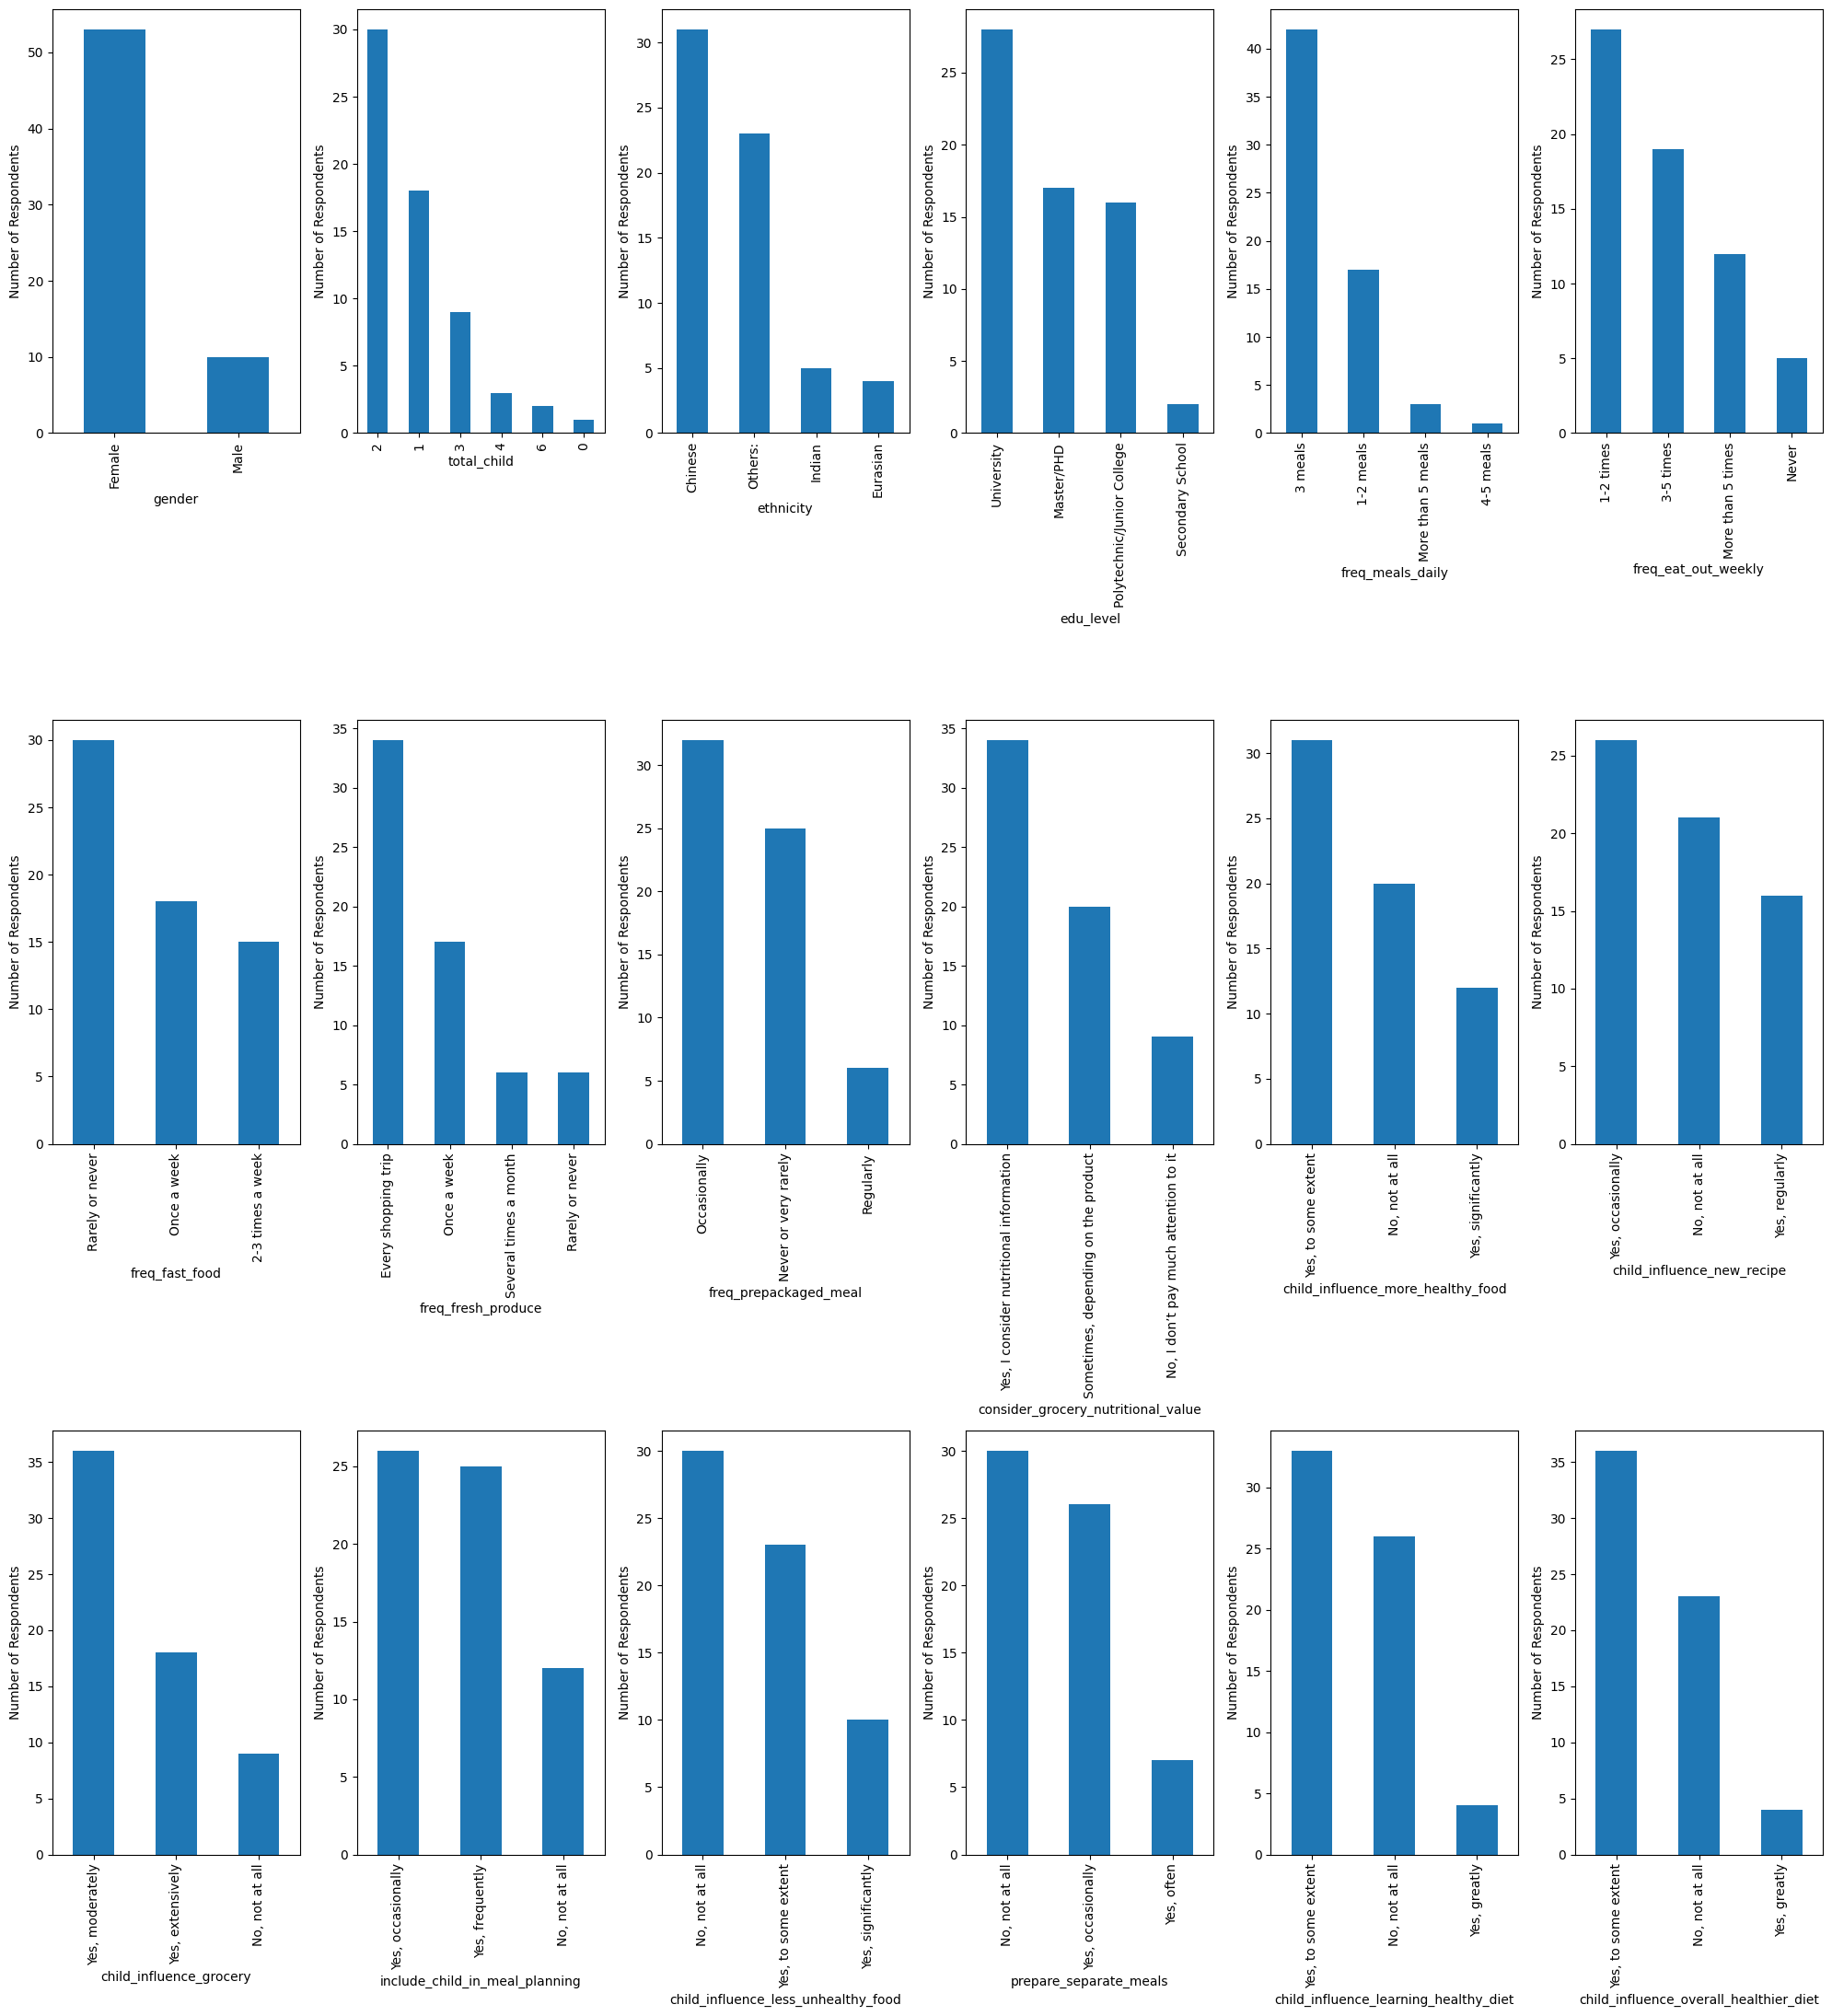

In [80]:
categorical_variables = [
    'gender', 'total_child','ethnicity', 'edu_level', 'freq_meals_daily',
    'freq_eat_out_weekly', 'freq_fast_food', 'freq_fresh_produce',
    'freq_prepackaged_meal', 'consider_grocery_nutritional_value',
    'child_influence_more_healthy_food', 'child_influence_new_recipe',
    'child_influence_grocery', 'include_child_in_meal_planning',
    'child_influence_less_unhealthy_food', 'prepare_separate_meals',
    'child_influence_learning_healthy_diet', 'child_influence_overall_healthier_diet'
]

# Create a grid of subplots
fig, axes = plt.subplots(3, 6, figsize=(20, 22))
axes = axes.ravel()

# Plot each categorical variable
for i, category in enumerate(categorical_variables):
    ax = axes[i]
    counts = df[category].value_counts()
    counts.plot(kind='bar', ax=ax)
    ax.set_xlabel(category)
    ax.set_ylabel('Number of Respondents')
    plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

# Remove any empty subplots (if there are more subplots than categories)
for i in range(len(categorical_variables), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [83]:
df[['age','total_child']].corr('pearson')

,age,total_child
age,1.0000,-0.0513
total_child,-0.0513,1.0000


In [81]:
df.tail()

,gender,age,ethnicity,ethnicity_o,edu_level,total_child,f_child,f_child_age,m_child,m_child_age,freq_meals_daily,freq_eat_out_weekly,reasons_eat_out,reasons_eat_out_o,reasons_eat_in,reasons_eat_in_o,freq_fast_food,reasons_fast_food,preference_cooking_method,preference_cooking_method_o,reasons_preference_cooking_method,reasons_preference_cooking_method_o,who_make_decisions,who_make_decisions_o,type_grocery,type_grocery_o,freq_fresh_produce,freq_prepackaged_meal,consider_grocery_nutritional_value,child_influence_more_healthy_food,child_influence_new_recipe,child_influence_grocery,include_child_in_meal_planning,child_influence_less_unhealthy_food,prepare_separate_meals,child_influence_learning_healthy_diet,child_influence_overall_healthier_diet,reasons_child_influence,reasons_no_child_influence,reasons_no_child_influence_o
58,Male,54,Others:,Caucasian,Polytechnic/Junior College,3,0,[],3,"[25, 32, deceased]",1-2 meals,1-2 times,"['Convenience', 'Socialising/celebrations']",,"['Health and nutrition', 'Cost savings']",,Rarely or never,[''],"['Grilling', 'Baking']",,"['Health and nutrition', 'Dietary goals and weight management', 'Taste and preference']",,['Myself (parents)'],,"['Vegetables', 'Proteins', 'Dairy products', 'Snacks and treats']",,Once a week,Never or very rarely,"Sometimes, depending on the product","No, not at all","Yes, occasionally","No, not at all","Yes, occasionally","No, not at all","No, not at all","No, not at all","Yes, to some extent",['I am open to learning from my child(ren) and incorporating new insights into my own diet choices'],['I am accustomed to my own dietary habits'],
59,Female,63,Chinese,,Polytechnic/Junior College,2,1,[36],1,[26],1-2 meals,3-5 times,"['Convenience', 'Socialising/celebrations', 'Time constraints', ""Child(ren)'s preferences""]",,"['Health and nutrition', 'Family bonding time', 'Taste and preferences', 'Hygiene']",,Once a week,['Time constraints'],"['Boiling/steaming', 'Stir frying']",,"['Health and nutrition', 'Dietary goals and weight management', 'Ease of cleaning up after']",,['Myself (parents)'],,"['Fruits', 'Vegetables', 'Grains', 'Proteins', 'Dairy products']",,Every shopping trip,Never or very rarely,"Yes, I consider nutritional information","Yes, significantly","Yes, regularly","Yes, extensively","Yes, occasionally","Yes, to some extent","Yes, occasionally","Yes, to some extent","Yes, to some extent",['I value my child(ren)’s input and adapt my own diet to accommodate shared mealtime experiences'],['Not applicable'],
60,Female,50,Chinese,,Polytechnic/Junior College,1,1,[21],0,[],3 meals,1-2 times,"['Socialising/celebrations', 'Variety']",,"['Health and nutrition', 'Cost savings', 'Family bonding time']",,Rarely or never,[''],"['Boiling/steaming', 'Stir frying']",,"['Health and nutrition', 'Taste and preference', 'Culinary traditions']",,['Myself (parents)'],,"['Vegetables', 'Proteins', 'Dairy products']",,Once a week,Never or very rarely,"Yes, I consider nutritional information","Yes, significantly","Yes, occasionally","Yes, moderately","Yes, frequently","Yes, to some extent","Yes, occasionally","Yes, to some extent","Yes, to some extent","[""I recognize the positive impact that my child(ren)'s choices have on my overall health and well-being""]",['Not applicable'],
61,Female,34,Others:,,Master/PHD,1,0,[],1,[3],3 meals,1-2 times,"['Socialising/celebrations', 'Indulgence']",,"['Health and nutrition', 'Cost savings', 'Family bonding time', 'Hygiene']",,2-3 times a week,['Convenience'],"['Boiling/steaming', 'Stir frying', 'Others']",Air frying,"['Health and nutrition', 'Taste and preference']",,['Myself (parents)'],,"['Fruits', 'Vegetables', 'Grains', 'Proteins', 'Dairy products']",,Every shopping trip,Occasionally,"Yes, I consider nutritional information","Yes, to some extent","Yes, occasionally","Yes, moderately","Yes, frequently","No, not at all","No, not at all","No, not at all","Yes, to some extent",['I am open to learning from my child(ren) and incorporating new insights

<Axes: ylabel='Frequency'>

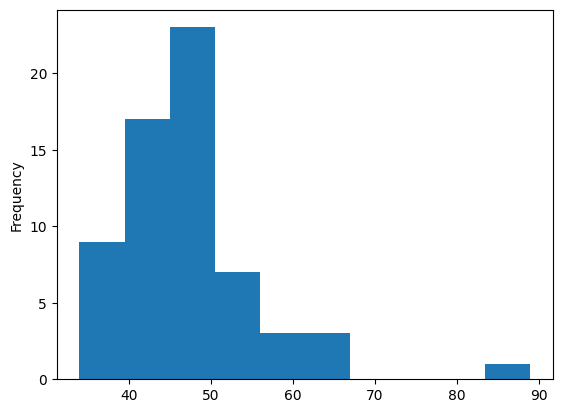

In [57]:
df['age'].plot(kind='hist')